# Logistic regression

Usually used to predict a binary output classification of 0 or 1. yes/no. Pass/fail, win/lose, healthy/sick 

Uses Sigmoid Function

Example to think about:

- If probability is above 0.5 predict 1. 
- If probability is below 0.5 predict 0. 

Confusion Matrix:




### Import Libraries

In [1]:
# import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import Dataset

In [5]:
#import Data into Pandas DataFrame
training_set = pd.read_csv('../datasets/titanic/Train_Titanic.csv')

In [6]:
#Verify Data imported
training_set.head(10)
# training_set.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Explore Dataset

In [7]:
survived = training_set[training_set['Survived']==1]
no_survived = training_set[training_set['Survived']==0]

In [8]:
print('Total Passengers = ', len(training_set))
print('Number of Passengers who survived = ', len(survived))
print('Number of Passengers who died = ', len(no_survived))
print('% Survived = ', 1 * len(survived)/len(training_set) * 100)
print('% Died = ', 1 * len(no_survived)/len(training_set) * 100)

Total Passengers =  891
Number of Passengers who survived =  342
Number of Passengers who died =  549
% Survived =  38.38383838383838
% Died =  61.61616161616161


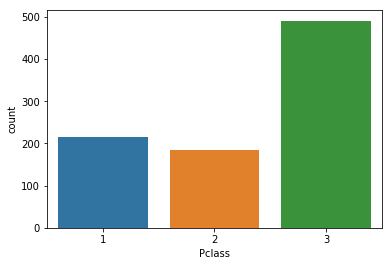

In [9]:
# plot Passenger class numbers
sns.countplot(x = 'Pclass', data = training_set)

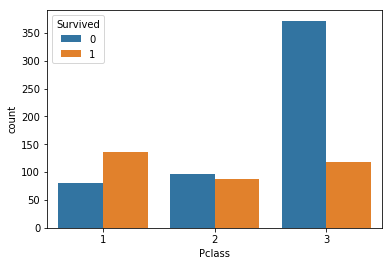

In [10]:
# plot Passenger survival by class numbers
sns.countplot(x = 'Pclass', hue = 'Survived', data = training_set)

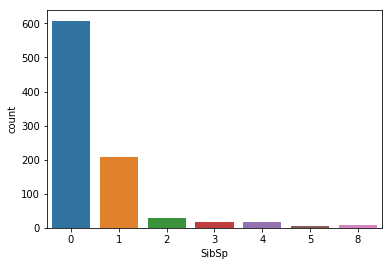

In [11]:
# plot Passenger siblings
sns.countplot(x = 'SibSp', data = training_set)

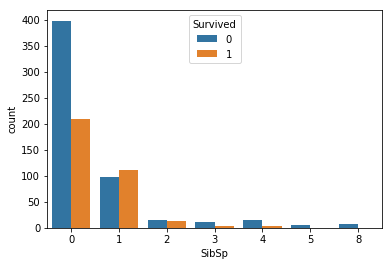

In [12]:
# plot Passenger survival with siblings
sns.countplot(x = 'SibSp', hue = 'Survived', data = training_set)

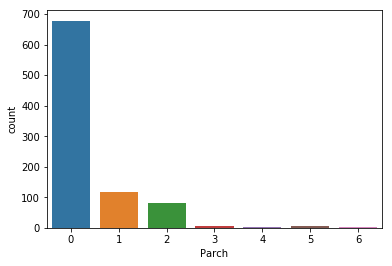

In [13]:
# plot Passengers with Parent / child
sns.countplot(x = 'Parch', data = training_set)

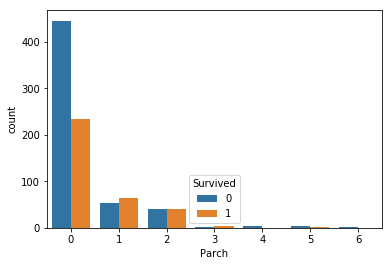

In [14]:
# plot Passenger survival with Parent / child
sns.countplot(x = 'Parch', hue = 'Survived', data = training_set)

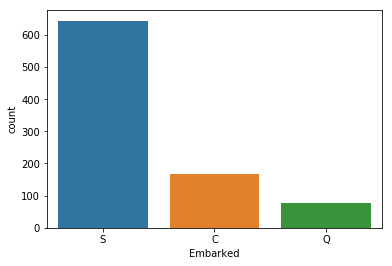

In [15]:
# plot Passengers embarked
sns.countplot(x = 'Embarked', data = training_set)

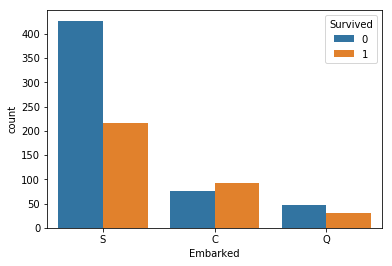

In [16]:
# plot Passenger survival from Embarked
sns.countplot(x = 'Embarked', hue = 'Survived', data = training_set)

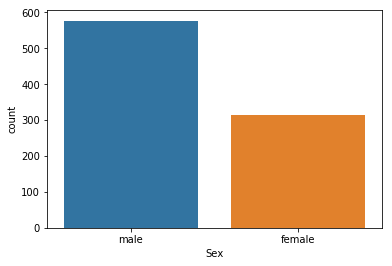

In [17]:
# plot Passengers Sex
sns.countplot(x = 'Sex', data = training_set)

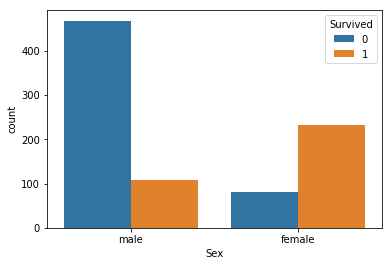

In [18]:
# plot Passengers Sex Survival
sns.countplot(x = 'Sex', hue = 'Survived', data = training_set)

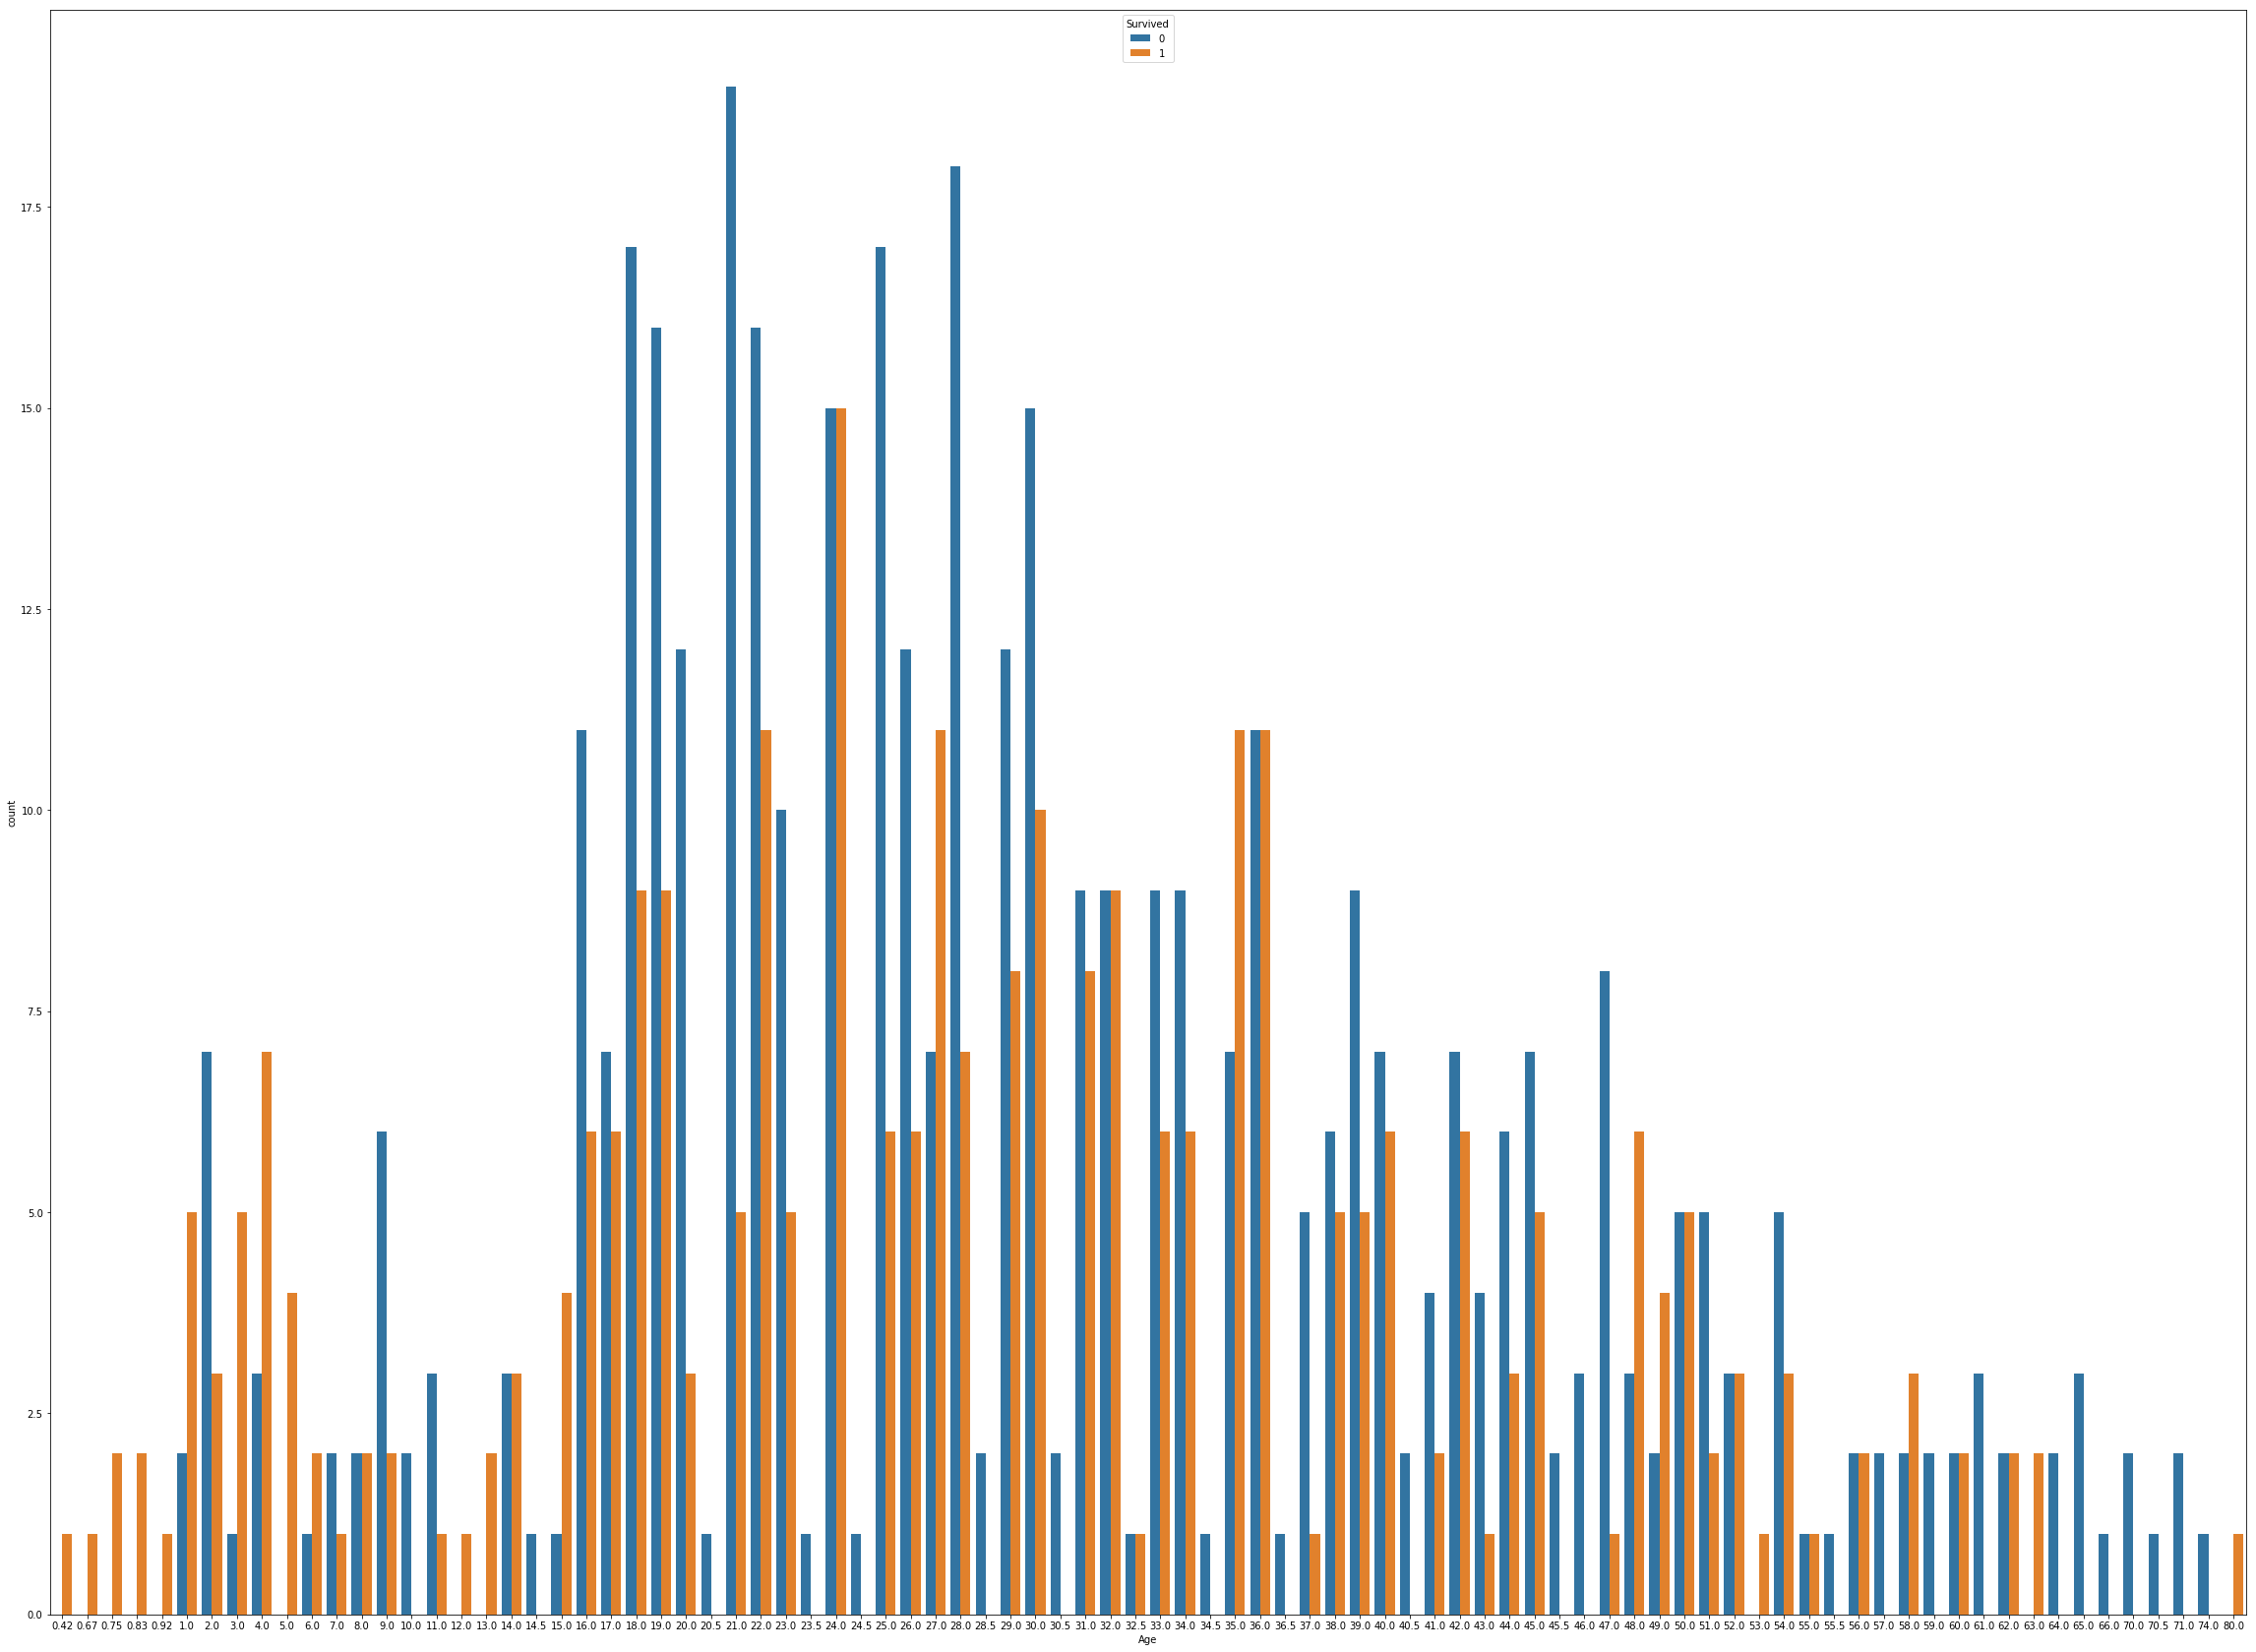

In [19]:
# Plot survival by Age
plt.figure(figsize =  (40, 30))
sns.countplot(x = 'Age', hue = 'Survived', data = training_set)

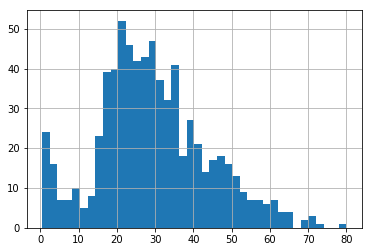

In [20]:
training_set['Age'].hist(bins = 40)

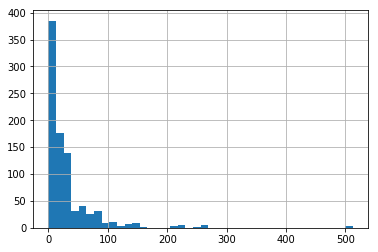

In [21]:
training_set['Fare'].hist(bins = 40)

### Cleaning Data


In [22]:
training_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### To be cleaned:

- Nans



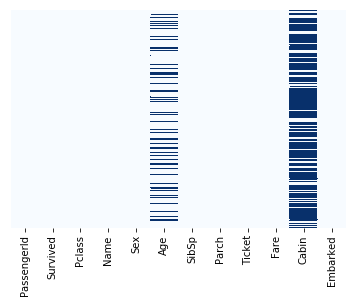

In [23]:
# Find out where NaNs occur
sns.heatmap(training_set.isnull(),yticklabels = False, cbar = False, cmap = 'Blues')

#### Columns we don't need:

- Cabin
- Name
- Ticket
- Embarked
- Passenger ID

In [24]:
# drop Cabin Data
training_set.drop('Cabin', axis = 1, inplace = True)

In [25]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
# drop rest of columns not needed:
training_set.drop(['Name','Ticket','Embarked', 'PassengerId'], axis = 1, inplace = True)



In [27]:
training_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


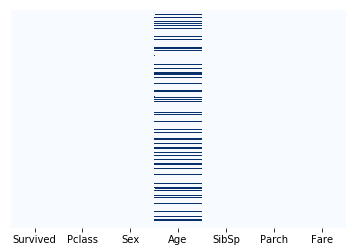

In [28]:
# Find out where NaNs stil occur
sns.heatmap(training_set.isnull(),yticklabels = False, cbar = False, cmap = 'Blues')

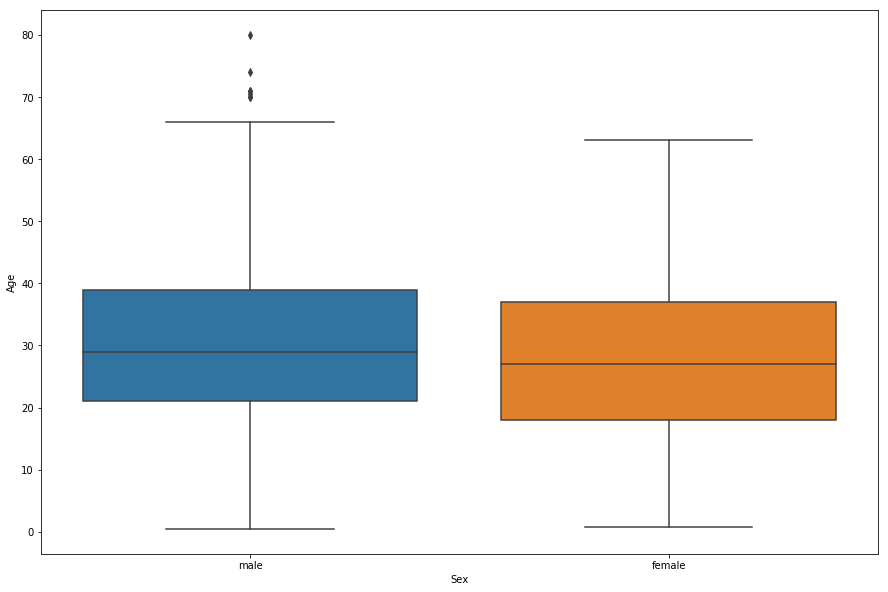

In [29]:
#plot average ages
plt.figure(figsize = (15,10))
sns.boxplot(x = 'Sex', y = 'Age', data = training_set)

In [30]:
# replace NaN Ages with average ages based on Sex
def fill_age(data):
    age = data[0]
    sex = data[1]
    
    if pd.isnull(age):
        if sex is 'male':
            return 29
        else:
            return 25
    else:
        return age



In [31]:
training_set['Age'] = training_set[['Age', 'Sex'] ].apply(fill_age, axis = 1)

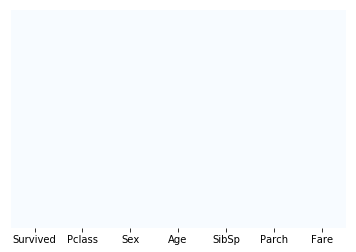

In [32]:
# Verify NaNs no longer apear
sns.heatmap(training_set.isnull(),yticklabels = False, cbar = False, cmap = 'Blues')

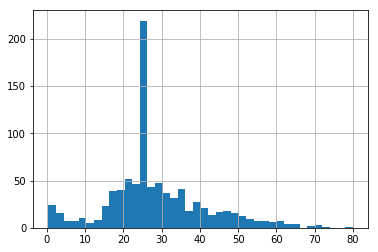

In [33]:
# see new distibution after replacing NaNs
# May affect prediction results with such big changes
training_set['Age'].hist(bins = 40)

In [34]:
training_set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,25.0,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


In [35]:
male = pd.get_dummies(training_set['Sex'])

In [36]:
male

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [37]:
# Drop column because we only need one
male = pd.get_dummies(training_set['Sex'], drop_first = True)

In [38]:
male

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [39]:
# Drop Sex Column
training_set.drop(['Sex'], axis = 1, inplace = True)

In [40]:
training_set = pd.concat([training_set, male], axis = 1)

In [41]:
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


### Assign Data and Labels

In [42]:
X = training_set.drop('Survived', axis = 1).values

In [43]:
X

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    , 25.    ,  1.    ,  2.    , 23.45  ,  0.    ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ,  1.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ,  1.    ]])

In [44]:
y = training_set['Survived'].values

In [45]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

### Training the Model 

In [50]:
# Train Test Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)


In [53]:
# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Model Evaluation 

In [54]:
y_predict = classifier.predict(X_test)

In [55]:
y_predict

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0])

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
cm = confusion_matrix(y_test, y_predict)

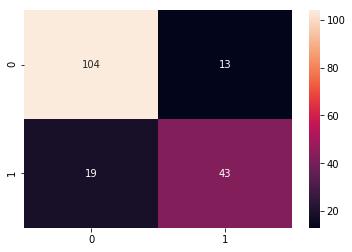

In [61]:
sns.heatmap(cm, annot = True, fmt = 'd')

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.85      0.89      0.87       117
          1       0.77      0.69      0.73        62

avg / total       0.82      0.82      0.82       179

